# Exporting data to other tools

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mdtraj as md
traj = md.load("5550217/kras.xtc", top="5550217/kras.pdb")
topology = traj.topology

In [2]:
from contact_map import ContactFrequency

In [3]:
traj_contacts = ContactFrequency(traj)

## Exporting contact data

Contact Map Explorer makes it easy for you to get your contact data into other formats, so that you can use the tools you're already familiar with to perform your analysis. Note that the residues and atoms of these report as integers, so what you have is the index of the object in the MDTraj topology,

### SciPy sparse matrix

In [4]:
traj_contacts.residue_contacts.sparse_matrix

<219x219 sparse matrix of type '<class 'numpy.float64'>'
	with 3034 stored elements in Dictionary Of Keys format>

### Pandas dataframe

In [5]:
traj_contacts.residue_contacts.df

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019802
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.009901,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NetworkX graph

This requires separately installing [NetworkX](https://networkx.org/), which does not come with Contact Map Explorer in a default installation.

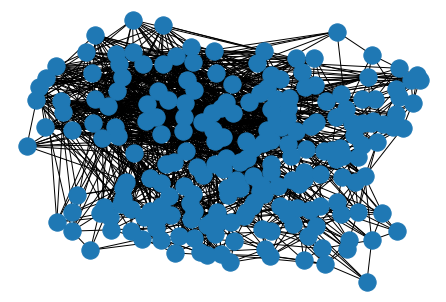

In [6]:
import networkx as nx
graph = traj_contacts.residue_contacts.to_networkx()
nx.draw(graph)

### Direct access to the `Counter`

For `ContactFrequency` and `ContactDifference` you can directly access the internal [collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter) object that stores the contact frequency. This `Counter` is a mapping of a `frozenset` of the MDTraj indices (`int`s) to the frequency.

In [7]:
counter = traj_contacts.residue_contacts.counter
dict(list(counter.items())[:5])  # to illustrate a few

{frozenset({15, 57}): 0.9900990099009901,
 frozenset({150, 153}): 0.9405940594059405,
 frozenset({83, 116}): 1.0,
 frozenset({111, 154}): 0.5841584158415841,
 frozenset({129, 133}): 1.0}

### Python pickle file

The approaches listed above give you a way to export the contact matrix. But when you do that, you lose the information connecting residue contacts to atom contacts. Sometimes you just want to export your data so you can load it up later to continue your analysis. In this case, the `save_to_file` method, which uses Python's `pickle` module, is the best tool.

In [8]:
traj_contacts.save_to_file("contacts.p")

This is also allows you to reload your data. Because the other approaches can't preserve all the information we store, we cannot recreate our objects from, for example, a SciPy sparse matrix.

In [9]:
ContactFrequency.from_file("contacts.p")

### JSON string

You can also save all the information, including information connecting residue contacts to atom contacts, as a JSON string. This is useful if you need to transfer a `ContactFrequency` to another machine during a parallelized analysis. It can also be written to disk, though the `pickle` format is likely to be more efficient.

In [10]:
json_str = traj_contacts.to_json()

In [11]:
ContactFrequency.from_json(json_str)